<a href="https://colab.research.google.com/github/Mdawood1122/MSC-Dissertation/blob/main/dissertation_mobile_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
import time

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/mobile_price/train/train.csv")   # load training data file


X=df_train.drop('price_range',axis=1)                   #remove dependent variable "Price_range" and move all indepentdent variable to variable X
y=df_train['price_range']                               # assign the value of dependent variable to y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)  # split data into 30% for testing and remaining 70% for training


**Models at default hyperparameters value**

In [ ]:
RFC = RandomForestClassifier()                # creation of Random forest classifier
RFC_mobile=RFC.fit(X_train, y_train)          # training of the model
RFC_mobile.score(X_test,y_test)               # Evaluation of model

0.8733333333333333

In [ ]:
svm_classi = svm.SVC()                           # create SVC
SVC_mobile=svm_classi.fit(X_train, y_train)      # training model with training dataset
SVC_mobile.score(X_test,y_test)                  #evaluation

0.945

In [ ]:
knn = KNeighborsClassifier()                # creationof KNN
KNN_mobile=knn.fit(X_train,y_train)
KNN_mobile.score(X_test,y_test)

0.9383333333333334

**Hyperparameter Tunning of RFC **

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


**Bayesian Search for RFC**

In [ ]:
from skopt import BayesSearchCV

param_space = {
    'n_estimators': (50, 500),             # Number of trees
    'max_features': (0.1, 0.9),            # Number of features considered at each split
    'min_samples_split': (2, 20),          # Minimum number of samples
    'min_samples_leaf': (1, 20),           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}
start_time=time.time()                     #start timer before the execution of optimization process

opt = BayesSearchCV(RFC_mobile, param_space, n_iter=100, cv=5)  # create bayesian optimization alogirthm
opt.fit(X_train, y_train)
end_time = time.time()                     #end timer

execution_time = end_time - start_time     # Calculate the time taken
best_params = opt.best_params_            #best parameters found
best_model = opt.best_estimator_          # model's result at best parameters found

# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.9033333333333333
Time taken (in seconds): 1337.8981323242188


**Bayesian Search for SVC**

In [ ]:
from skopt import BayesSearchCV
param_space = {
    'C': (0.1, 10.0, 'log-uniform'),
    'kernel': ['linear', 'rbf'],
    'gamma': (1e-5, 1e+1, 'log-uniform')
}


start_time = time.time()                    # Start timer
opt = BayesSearchCV(SVC_mobile, param_space, n_iter=100, cv=5)    # Perform Bayesian Optimization
opt.fit(X_train, y_train)                   # train model on training dataset
end_time = time.time()                      #end timer
execution_time = end_time - start_time      # total execution time
best_params = opt.best_params_              #optimal hyperparameters
best_model = opt.best_estimator_
test_accuracy = best_model.score(X_test, y_test)  # Evaluate the model on the test data
print('Test accuracy:', test_accuracy)            # Find Accuracy of the model on the test dataset
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.9583333333333334
Time taken (in seconds): 1743.217700958252


**Bayesian Search for KNN**

In [ ]:
from skopt import BayesSearchCV
param_space = {
    'n_neighbors': (1, 35),                      # define Number of neighbors
    'weights': ['uniform', 'distance'],          # Weight function
    'p': (1, 2)                                  # Power parameters (1 for Manhattan, 2 for Euclidean)
}
start_time = time.time()                         # Start of timer

opt = BayesSearchCV(KNN_mobile, param_space, n_iter=100, cv=5)  #Bayesian Optimization
opt.fit(X_train, y_train)
end_time = time.time()                           #end of timer
execution_time = end_time - start_time           #total execution time
best_params = opt.best_params_                   #optimal parameters
best_model = opt.best_estimator_                 # result of model on optimal parameters
test_accuracy = best_model.score(X_test, y_test) # Evaluate of model on the test data
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

Test accuracy: 0.9366666666666666
Time taken (in seconds): 295.12186193466187


**Random search for RFC**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),          # Number of trees
    'max_features': np.arange(0.1, 1.0, 0.1),           # number of features to consider at each split
    'min_samples_split': np.arange(2, 21, 2),           # Minimum number of samples
    'min_samples_leaf': np.arange(1, 21, 2),            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                          # bootstrap samples are used or not used when building trees
}
start_time=time.time()
random_search = RandomizedSearchCV(RFC_mobile, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1) # Perform Randomized Search with specified iterations
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time                  # estimation of execution time
best_params = random_search.best_params_
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.8983333333333333
Time taken (in seconds): 907.8515632152557


**Random search for SVC**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_dist = {
    'C': uniform(0.1, 10),                     # uniform distribution for C
    'kernel': ['linear', 'rbf'],               # list of kernal choice
    'gamma': uniform(0.001, 0.1)               # uniform distribution fof gamma
}
start_time = time.time()                       #starting of timer
random_search_SVC = RandomizedSearchCV(SVC_mobile, param_distributions=param_dist, n_iter=100, cv=5)
random_search_SVC.fit(X_train, y_train)            # training selected optimized algorithm
end_time = time.time()
execution_time = end_time - start_time         #execution time of optimized algorithm
best_params = random_search_SVC.best_params_
best_model = random_search_SVC.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.9583333333333334
Time taken (in seconds): 1650.9709198474884


**Random search for KNN**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
param_dist = {
    'n_neighbors': randint(1,50 ),             # Number of neighbors
    'weights': ['uniform', 'distance'],        # Weight function
    'p': [1, 2]                                #Power parameters
}
start_time = time.time()
random_search = RandomizedSearchCV(KNN_mobile, param_distributions=param_dist, n_iter=100, cv=20) #Random search
random_search.fit(X_train, y_train)            #Training of algorithm
end_time = time.time()
execution_time = end_time - start_time
best_params = random_search.best_params_       #best hyperparameters
best_model = random_search.best_estimator_
# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.9366666666666666
Time taken (in seconds): 33.45869278907776


**Grid search for RFC**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    'n_estimators': [100, 200, 400],                    # Number of trees
    'max_features': np.arange(0.1, 0.5, 0.1),           # features to be consider at each split
    'min_samples_split': [2, 5, 10],                    # Minimum number of samples
    'min_samples_leaf': [1, 5, 10],                     # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                          # bootstrap samples are used or not used when building trees
}
start_time = time.time()
grid_search = GridSearchCV(RFC_mobile, param_dist, cv=5,n_jobs=-1)   #Grid search
grid_search.fit(X_train, y_train)  # Use full data for grid search
end_time = time.time()
execution_time = end_time - start_time
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.8933333333333333
Time taken (in seconds): 849.0550863742828


**Grid search for SVC**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto']
}
start_time = time.time()
grid_search = GridSearchCV(SVC_mobile, param_grid, cv=5)
grid_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)
print('Time taken (in seconds):', execution_time)

Test accuracy: 0.9583333333333334
Time taken (in seconds): 272.22037267684937


**Grid search for KNN**

In [ ]:

classifier = KNeighborsClassifier()  # Use KNeighborsClassifier for KNN
param_grid = {
    'n_neighbors': range(1, 50),         # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 3]                          # Power parameter (1 for Manhattan, 2 for Euclidean)
}
start_time = time.time()
grid_search = GridSearchCV(KNN_mobile, param_grid, cv=5) #grid search
grid_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print('Best Hyperparameters:', best_params)
print('Test accuracy:', test_accuracy)            #accuracy at the test set
print('Time taken (in seconds):', execution_time)

Best Hyperparameters: {'n_neighbors': 13, 'p': 3, 'weights': 'distance'}
Test accuracy: 0.94
Time taken (in seconds): 116.056964635849


**K-MAP of best model at default hyperparametersbold text**

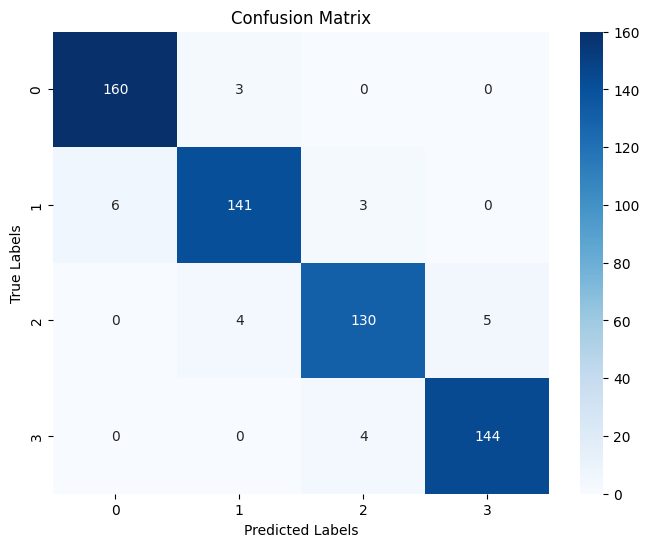

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       163
           1       0.95      0.94      0.95       150
           2       0.95      0.94      0.94       139
           3       0.97      0.97      0.97       148

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = random_search_SVC.predict(X_test)         # prediction on the test dataset
cm = confusion_matrix(y_test, y_pred)       #creation of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))   # print classification report